# Build Convolutional Neural Network to recongnize image

## Exploring and Processing the Data

In [38]:
from keras.datasets import cifar10

In [39]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [40]:
print('x_train shape:', x_train.shape)

x_train shape: (50000, 32, 32, 3)


In [41]:
print('x_test shape:', x_test.shape)

x_test shape: (10000, 32, 32, 3)


In [42]:
print('y_train shape:', y_train.shape)

y_train shape: (50000, 1)


In [43]:
print('y_test shape:', y_test.shape)

y_test shape: (10000, 1)


In [44]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


%matplotlib inline tells the notebook that you wish for the image to display within the image.

plt.imshow() is a function that displays the numbered pixel values in x_train[0] to the actual image it represents.

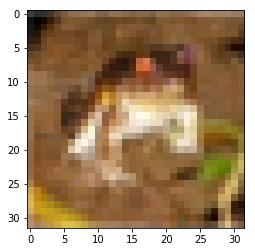

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

img = plt.imshow(x_train[0])

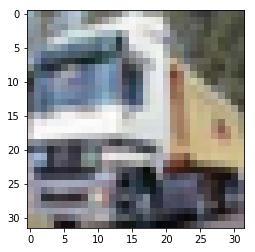

In [46]:
img = plt.imshow(x_train[1])

In [47]:
print('The label is:', y_train[0])

The label is: [6]


In [48]:
print('The label is:', y_train[1])

The label is: [9]


In [49]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [50]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [51]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [52]:
x_train[0]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

## Summary

In exploring and processing the data, we've: 1. Downloaded the dataset and visualize the images; 2. Changed the label to one-hot encodings; 3. Scale the image pixel values to take between 0 and 1

## Building and Training our Convolutional Neural Network

### First Step: Setting up the Architecture

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [54]:
model = Sequential()

Using the function model.add() to add this layer to our empty sequential model. 

The first number 32 refers to the depth, the next pair of number(3, 3) refer to the filter width and size, activation os 'relu', padding is 'same', stride = 1 is a default setting

In [55]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))

In [56]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [57]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [58]:
model.add(Dropout(0.25))

In [59]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Adding a Flatten layer to flatten cube-like format of neurons into one row.

In [60]:
model.add(Flatten())

In [61]:
model.add(Dense(512, activation='relu'))

In [62]:
model.add(Dropout(0.5))

In [63]:
model.add(Dense(10, activation='softmax'))

In [64]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
__________

### Second Step: Filling in the best numbers

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
hist = model.fit(x_train, y_train_one_hot, batch_size=32, epochs=20, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 146s 4ms/step - loss: 1.5755 - acc: 0.4227 - val_loss: 1.2105 - val_acc: 0.5629
Epoch 2/20
40000/40000 [==============================] - 137s 3ms/step - loss: 1.1689 - acc: 0.5803 - val_loss: 0.9927 - val_acc: 0.6519
Epoch 3/20
40000/40000 [==============================] - 140s 4ms/step - loss: 0.9976 - acc: 0.6476 - val_loss: 0.8708 - val_acc: 0.6907
Epoch 4/20
40000/40000 [==============================] - 125s 3ms/step - loss: 0.8902 - acc: 0.6838 - val_loss: 0.8090 - val_acc: 0.7119
Epoch 5/20
40000/40000 [==============================] - 126s 3ms/step - loss: 0.8132 - acc: 0.7141 - val_loss: 0.7668 - val_acc: 0.7336
Epoch 6/20
40000/40000 [==============================] - 127s 3ms/step - loss: 0.7441 - acc: 0.7404 - val_loss: 0.7110 - val_acc: 0.7534
Epoch 7/20
40000/40000 [==============================] - 128s 3ms/step - loss: 0.6993 - acc: 0.7545 - val_loss: 0.6968 - 

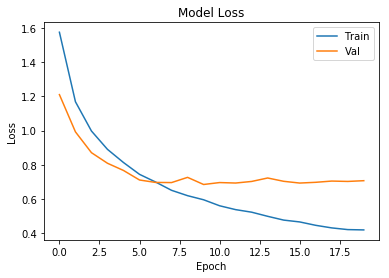

In [73]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

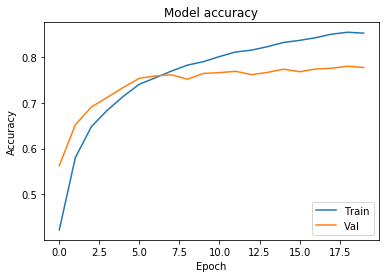

In [74]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [75]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 7s 694us/step


0.7652

In [76]:
model.save('my_cifar10_model.h5')

If want to load saved model in the future, use this line of code

from keras.models import load_model
model = load_model('my_cifar10_model.h5')

## Testing out with your own images

In [91]:
my_image = plt.imread("cat.jpg")

In [93]:
import numpy as np

In [94]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

ImportError: cannot import name '_hough_circle' from 'skimage.transform._hough_transform' (unknown location)

In [87]:
img = plt.imshow(my_image_resized)

NameError: name 'my_image_resized' is not defined

In [88]:
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))

NameError: name 'my_image_resized' is not defined

In [89]:
probabilities

NameError: name 'probabilities' is not defined

In [ ]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'fog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0, :])
print("Most likely class:", number_to_class[index[9]], "--Probability:", probabilities[0, index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])